# Data Loading and Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# imoprt tdqm for progress bar
from tqdm import tqdm
import os
import sys
tqdm.pandas()

In [2]:
review_df = pd.read_csv('Mid_DS_NLP.csv')

1- checking the null values in the df: there are no missing values in the dataset


In [3]:
# checking the null values in the df 
review_df.isnull().sum()

app_id      0
app_name    0
review      0
rating      0
dt          0
dtype: int64

2- examining the relationship between app_name, app_id

In [4]:
review_df[['app_name','app_id']].value_counts()

app_name                   app_id          
Free Fire                  1000600000622822    501780
PUBG MOBILE                1000600000652669    444840
Call of Duty: Mobile       1000600000734653    411600
Fishdom: Deep Dive         1000600000525878     76524
Solitaire - Grand Harvest  1000600000618898     73825
Wordscapes                 1000600000601387     66606
War Robots                 1000600000442493     57826
Gardenscapes - New Acres   1000600000547188     55453
World of Tanks Blitz       1000600000441585     45496
Disney Emoji Blitz         1000600000539249     35782
Name: count, dtype: int64

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing special characters and punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Removing words less than 3 characters
    tokens = [word for word in tokens if len(word) >= 3]

    # Removing numbers
    tokens = [word for word in tokens if not word.isnumeric()]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reassemble the text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Preprocess the reviews
review_df['processed_review'] = review_df['review'].progress_apply(preprocess_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zoherorabe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zoherorabe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zoherorabe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 1769732/1769732 [03:08<00:00, 9382.40it/s] 


3- understanding the statisical information related to the reviews length for each app game:
some insight from the analysis:
- A higher standard deviation for all app games indicates that the values in the data set are more spread out from the mean (average), suggesting greater variability.
- the minimum and maximum length for the app games are relatively close which indicate that there is no dominant reviews for specific game.
- the second table the minumum values for the products are zeros which mean that we have some non-meaning reviews in the dataset we should fiter them out during our analysis

In [6]:
review_df['review_length'] = review_df['review'].apply(lambda x:len(x))
review_df.groupby('app_name')['review_length'].describe()

,count,mean,std,min,25%,50%,75%,max
app_name,,,,,,,,
Call of Duty: Mobile,411600.0,104.529291,118.489719,5.0,29.0,62.0,134.0,4221.0
Disney Emoji Blitz,35782.0,141.950366,176.822650,7.0,39.0,84.0,178.0,4180.0
Fishdom: Deep Dive,76524.0,116.057446,152.147614,6.0,26.0,60.0,145.0,5717.0
Free Fire,501780.0,65.950676,83.618629,4.0,20.0,36.0,74.0,5922.0
Gardenscapes - New Acres,55453.0,104.022686,141.501666,5.0,24.0,52.0,128.0,6019.0
PUBG MOBILE,444840.0,76.841808,94.716823,4.0,22.0,42.0,92.0,5258.0
Solitaire - Grand Harvest,73825.0,75.053139,109.558822,7.0,21.0,37.0,78.0,3563.0
War Robots,57826.0,140.588939,179.064422,7.0,31.0,76.0,187.0,5998.0
Wordscapes,66606.0,96.537534,129.063870,6.0,26.0,50.0,113.0,3444.0


In [7]:
review_df['processed_review_length'] = review_df['processed_review'].apply(lambda x: len(x))

In [8]:
# Plotting the distribution of review length
review_df.groupby('app_name')['processed_review_length'].describe()

,count,mean,std,min,25%,50%,75%,max
app_name,,,,,,,,
Call of Duty: Mobile,411600.0,64.498472,72.493979,0.0,19.0,39.0,82.00,2700.0
Disney Emoji Blitz,35782.0,84.313342,104.819270,0.0,24.0,50.0,105.00,2679.0
Fishdom: Deep Dive,76524.0,69.860188,89.559094,0.0,17.0,37.0,87.00,3295.0
Free Fire,501780.0,42.308002,52.444232,0.0,14.0,24.0,48.00,5782.0
Gardenscapes - New Acres,55453.0,63.093070,83.585854,0.0,16.0,33.0,77.00,3285.0
PUBG MOBILE,444840.0,48.544857,58.416099,0.0,15.0,27.0,59.00,3167.0
Solitaire - Grand Harvest,73825.0,46.167938,63.817865,0.0,14.0,25.0,49.00,2068.0
War Robots,57826.0,85.779649,108.553768,0.0,20.0,47.0,113.00,3580.0
Wordscapes,66606.0,58.829114,76.729860,0.0,17.0,32.0,68.00,2194.0


In [9]:
# Function to classify sentiment based on player ratings
def classify_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

# Apply sentiment analysis to the reviews
review_df['sentiment'] = review_df['rating'].apply(classify_sentiment)

In [14]:
# sorting the review_df['dt']
review_df.sort_values(by='dt')

,app_id,app_name,review,rating,dt,processed_review,review_length,processed_review_length,sentiment
884865,1000600000652669,PUBG MOBILE,So beatuifull game So beatuifull game,5,2021-07-01,beatuifull game beatuifull game,37,31,positive
988515,1000600000734653,Call of Duty: Mobile,"Great, obviously. One thing that has annoyed m...",5,2021-07-01,great obviously one thing annoyed however sinc...,388,245,positive
54418,1000600000652669,PUBG MOBILE,Pubg is Bast,5,2021-07-01,pubg bast,12,9,positive
1544986,1000600000734653,Call of Duty: Mobile,This game is so much better since last time,5,2021-07-01,game much better since last time,43,32,positive
1545006,1000600000652669,PUBG MOBILE,He is a good game,5,2021-07-01,good game,17,9,positive
...,...,...,...,...,...,...,...,...,...
1428747,1000600000601387,Wordscapes,I love this game so much,5,2022-12-31,love game much,24,14,positive
217944,1000600000442493,War Robots,First of all anyone that has a problem with th...,2,2022-12-31,first anyone problem game giving five star sec...,1143,701,negative
619211,1000600000734653,Call of Duty: Mobile,It's very good.There are good maps and good at...,5,2022-12-31,goodthere good map good attachment gun,63,38,positive
842868,1000600000622822,Free Fire,jogatina legal,5,2022-12-31,jogatina legal,14,14,positive


- Positive vs Negative Vs Neutral sentiment in World of Tanks Blitz

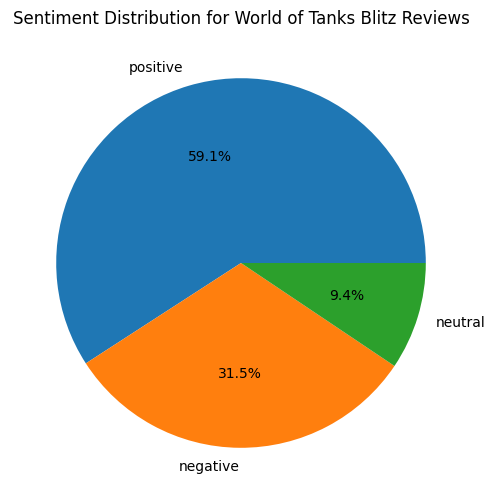

In [12]:
sentiment_counts = review_df[review_df['app_name'] == 'World of Tanks Blitz']['sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution for World of Tanks Blitz Reviews')
plt.show()

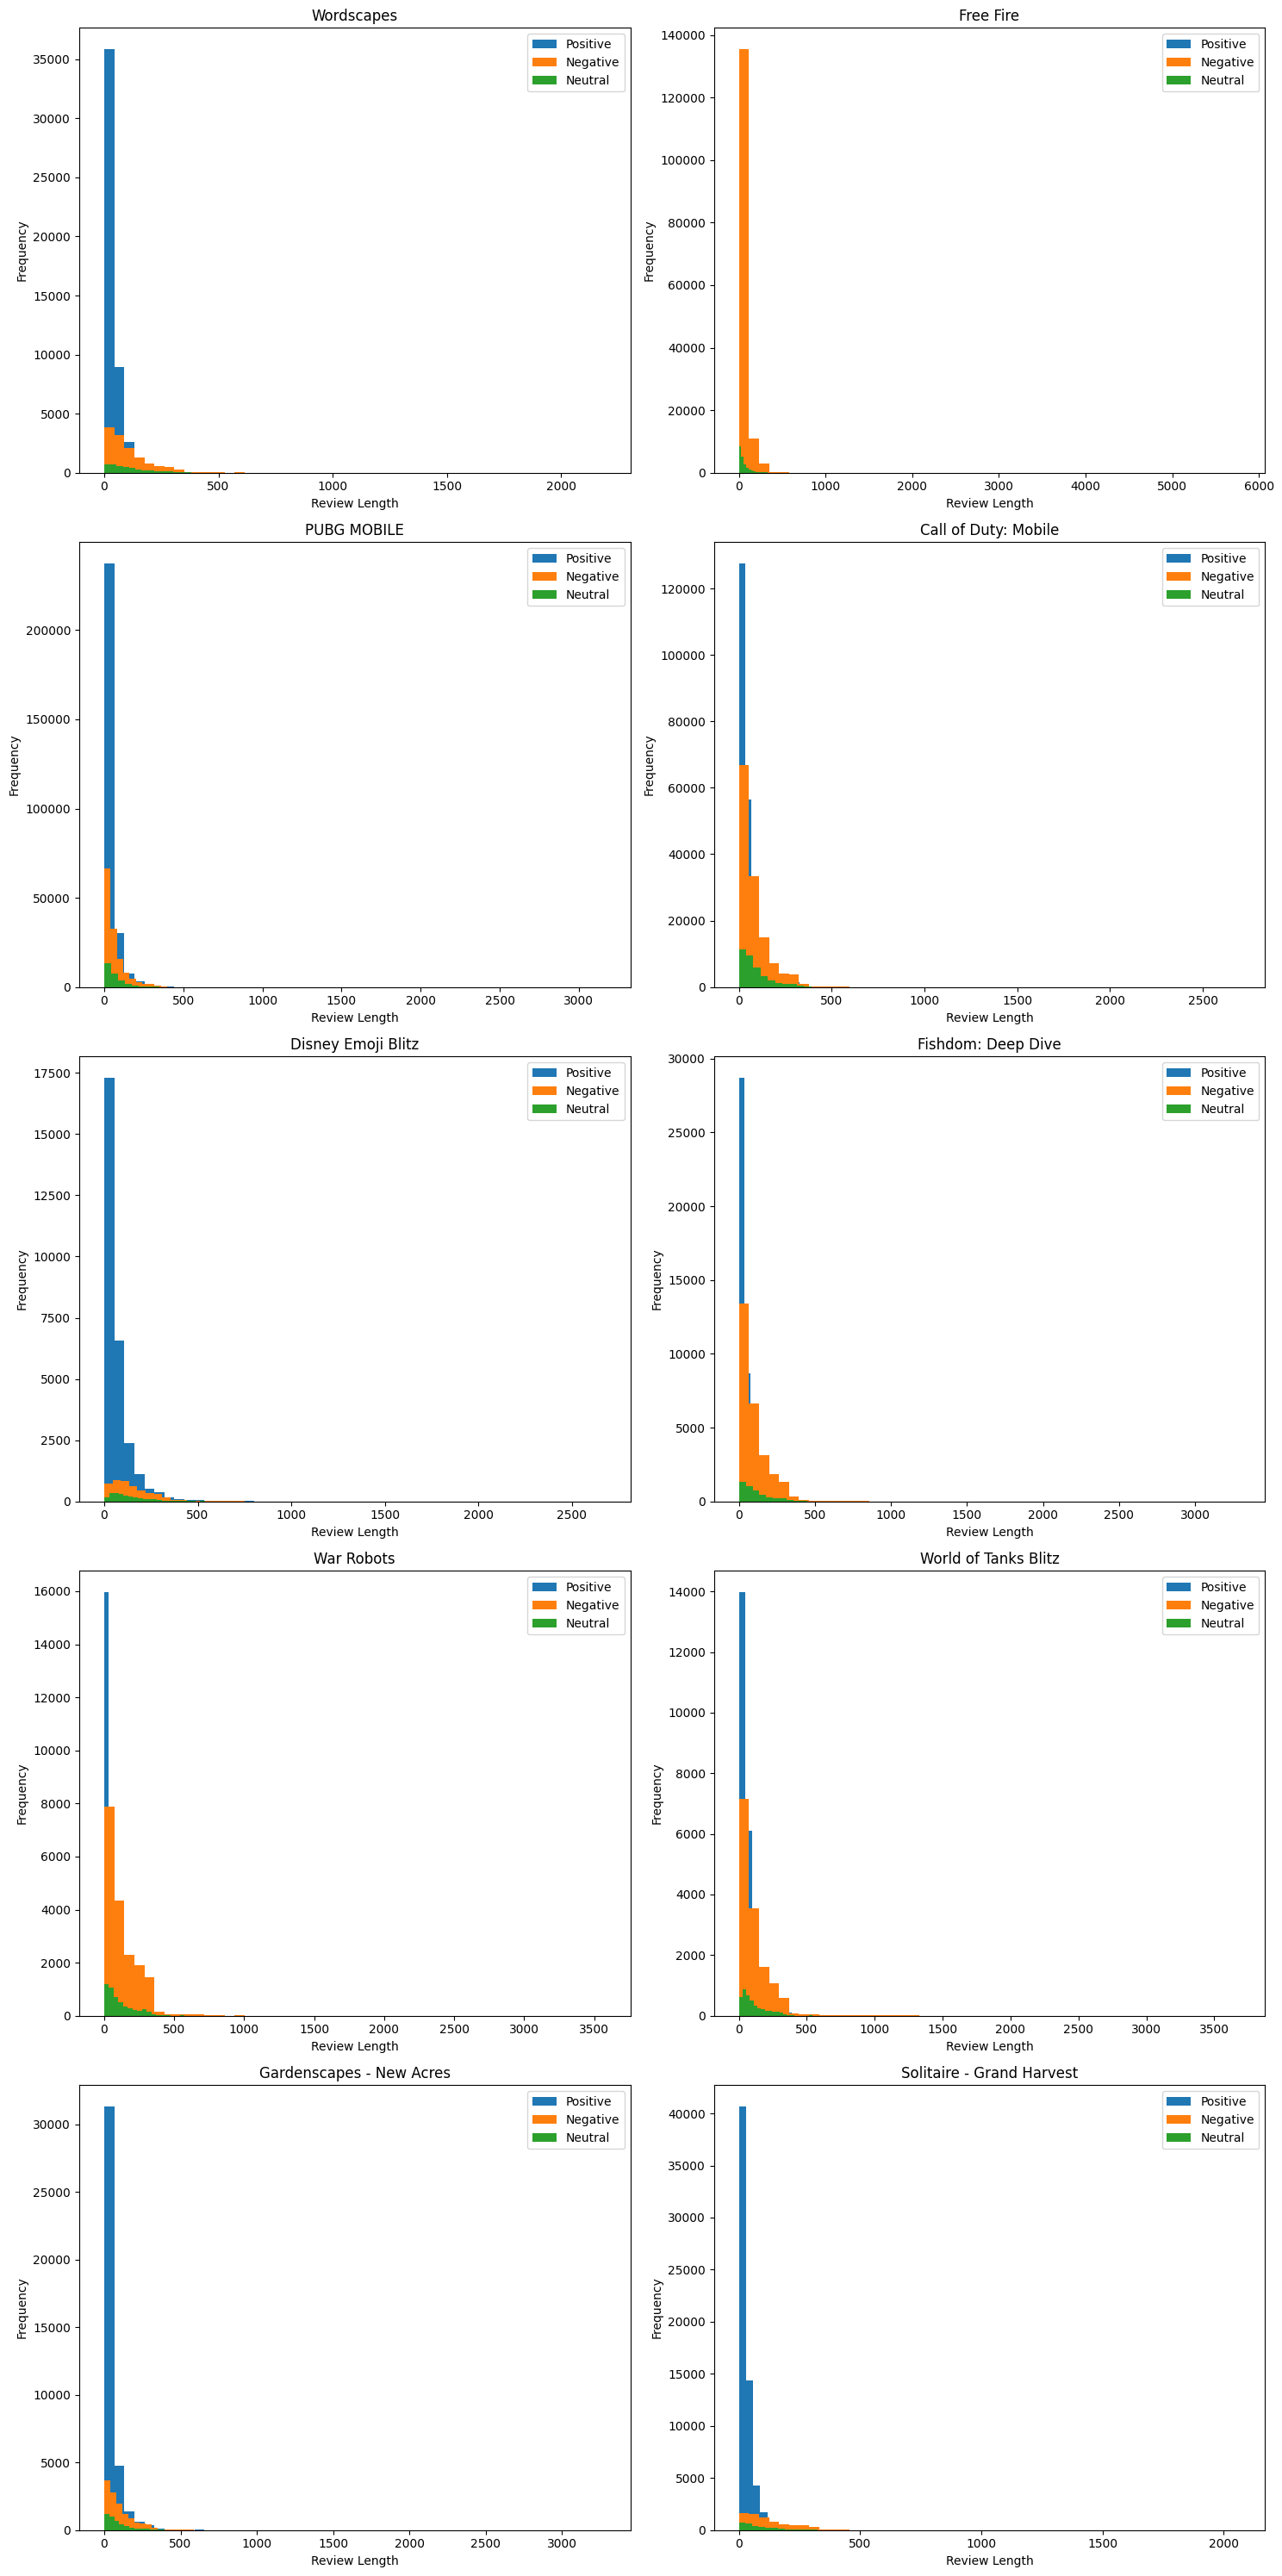

In [20]:
# ploting the distribution of review length for positive, negative, neutral reviews for each app in one figure
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
axes = axes.flatten()
for i, app in enumerate(review_df['app_name'].unique()):
    # calcualte the histogram for positive, negative, neutral reviews for each app with log scale
    axes[i].hist(review_df[ (review_df['app_name'] == app) & (review_df['sentiment'] == 'positive')]['processed_review_length'], bins=50, label='Positive')
    axes[i].hist(review_df[(review_df['app_name'] == app) & (review_df['sentiment'] == 'negative')]['processed_review_length'], bins=50, label='Negative')
    axes[i].hist(review_df[(review_df['app_name'] == app) & (review_df['sentiment'] == 'neutral')]['processed_review_length'], bins=50, label='Neutral')
    axes[i].legend()
    axes[i].set_title(app)
    axes[i].set_xlabel('Review Length')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

- from this distrubution we can understand that the review length for the positive, negatiev, neutral for each app are relatively close and there is not significant chance, but in most cases the number of length of negative reviews in the game app are greater than postive, neutral, and that is make sence beause the player write big complain when he is not satistfy.

- exploring the reviews which after applying preprocssing thier length became zero, which mean the the original review has only non-meaning words or has emojis and we can't exract insightful information fomre them

In [21]:
# select review with zero length
non_meaning_reviews = len(review_df[review_df['processed_review_length'] == 0])
print(f'There are {non_meaning_reviews} non-meaning reviews')
# sample the non-meaning reviews
review_df[review_df['processed_review_length'] == 0].sample(20)

There are 2148 non-meaning reviews


,app_id,app_name,review,rating,dt,processed_review,review_length,processed_review_length,sentiment
869031,1000600000622822,Free Fire,Ga !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!;...,5,2021-12-28,,66,0,positive
1179201,1000600000652669,PUBG MOBILE,What i's this,1,2021-10-17,,13,0,negative
134062,1000600000622822,Free Fire,P o l i s a n m,5,2021-11-13,,15,0,positive
1285215,1000600000622822,Free Fire,Dj of all on,2,2021-12-27,,12,0,negative
1185521,1000600000622822,Free Fire,M p M e M s o,5,2022-11-26,,13,0,positive
1532465,1000600000652669,PUBG MOBILE,This i😂🤣,5,2022-06-26,,8,0,positive
90376,1000600000622822,Free Fire,999+ 999+ 999+ all,5,2021-11-11,,18,0,positive
1163079,1000600000525878,Fishdom: Deep Dive,B A G U S....😘😘😘😘😘😘😘😘😘,5,2021-08-08,,22,0,positive
387500,1000600000622822,Free Fire,M............... L,5,2022-03-19,,18,0,positive
1346683,1000600000622822,Free Fire,😇😇si si,4,2022-01-29,,7,0,positive


In [22]:
# remove the non-meaning reviews
review_df = review_df[review_df['processed_review_length'] != 0]

In [23]:
review_df.shape

(1767584, 9)

<Axes: xlabel='app_name'>

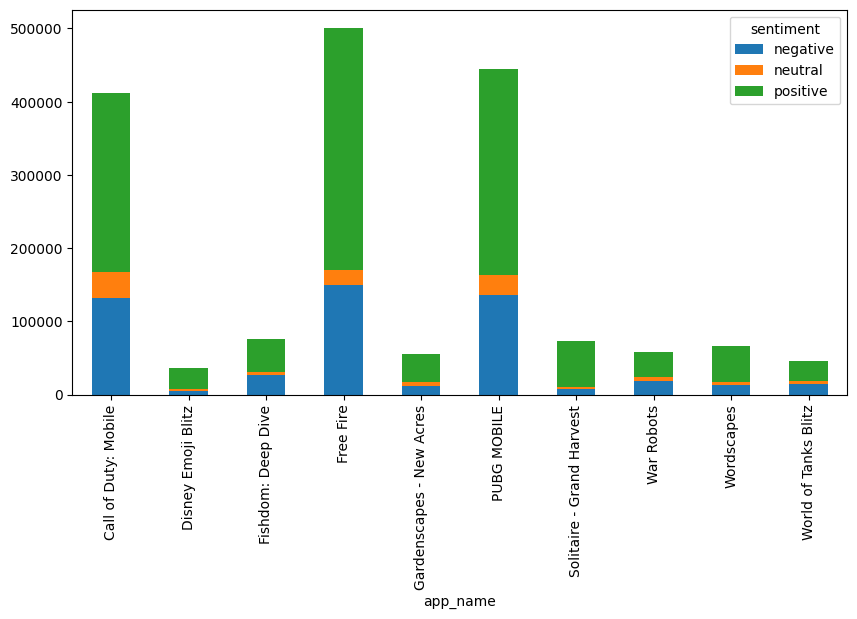

In [24]:
# showing the positive, neutral, negative distribution for each game
import matplotlib.pyplot as plt
review_df.groupby(['app_name','sentiment']).size().unstack().plot(kind='bar',stacked=True, figsize=(10,5))

In [25]:
# ranking the games based on the ratio of positive reviews
review_df.groupby('app_name')['sentiment'].value_counts(normalize=True).unstack().sort_values(by='positive', ascending=False)

sentiment,negative,neutral,positive
app_name,,,
Solitaire - Grand Harvest,0.098963,0.042355,0.858682
Disney Emoji Blitz,0.129036,0.068292,0.802672
Wordscapes,0.191691,0.059266,0.749043
Gardenscapes - New Acres,0.223901,0.079133,0.696966
Free Fire,0.298380,0.041811,0.659809
PUBG MOBILE,0.304658,0.063780,0.631561
War Robots,0.317770,0.086940,0.595290
Call of Duty: Mobile,0.320706,0.087113,0.592181
World of Tanks Blitz,0.314660,0.094072,0.591268


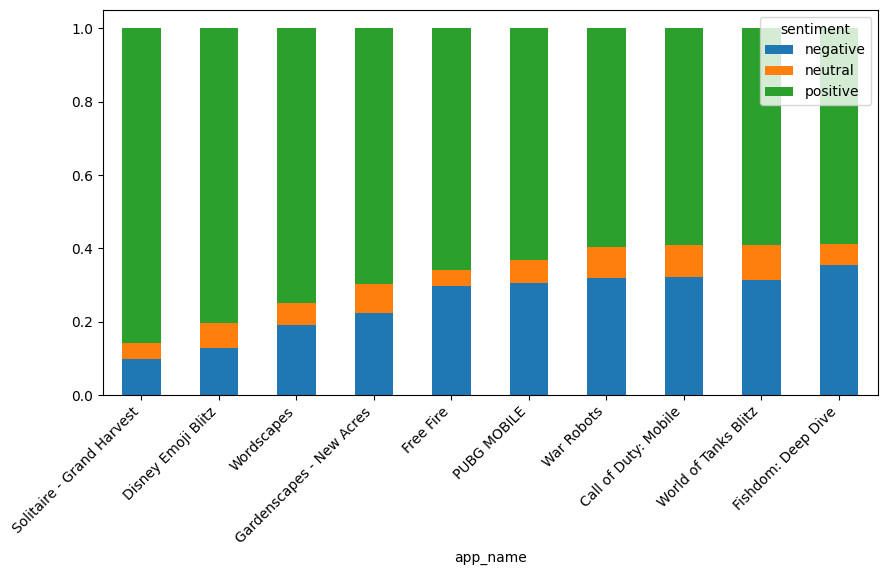

In [16]:
# plot the ranking of games based on the ratio of positive reviews
ax = review_df.groupby('app_name')['sentiment'].value_counts(normalize=True).unstack().sort_values(by='positive', ascending=False).plot(kind='bar', stacked=True, figsize=(10,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

- even the number of reviews are not equal for each app, which mean we don't have 100% fair evaluation, but ranking the app based on the general positive ratio can give us some insights.

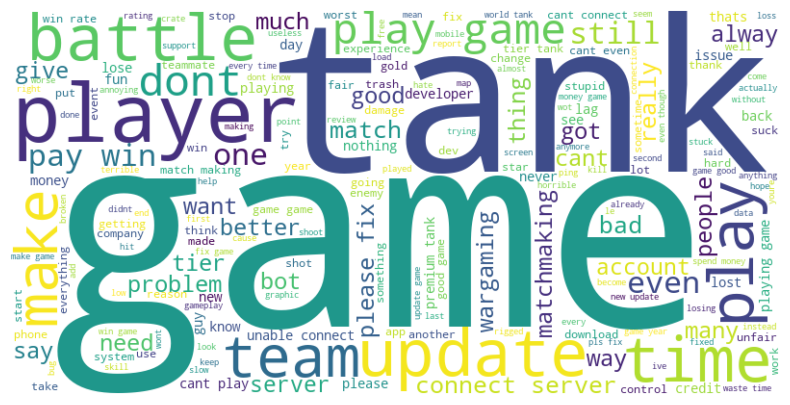

In [27]:
# draw wordcloud for each game
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
data = ' '.join(review_df[(review_df['app_name'] == 'World of Tanks Blitz')& (review_df['sentiment']=='negative')]['processed_review'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data)
# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


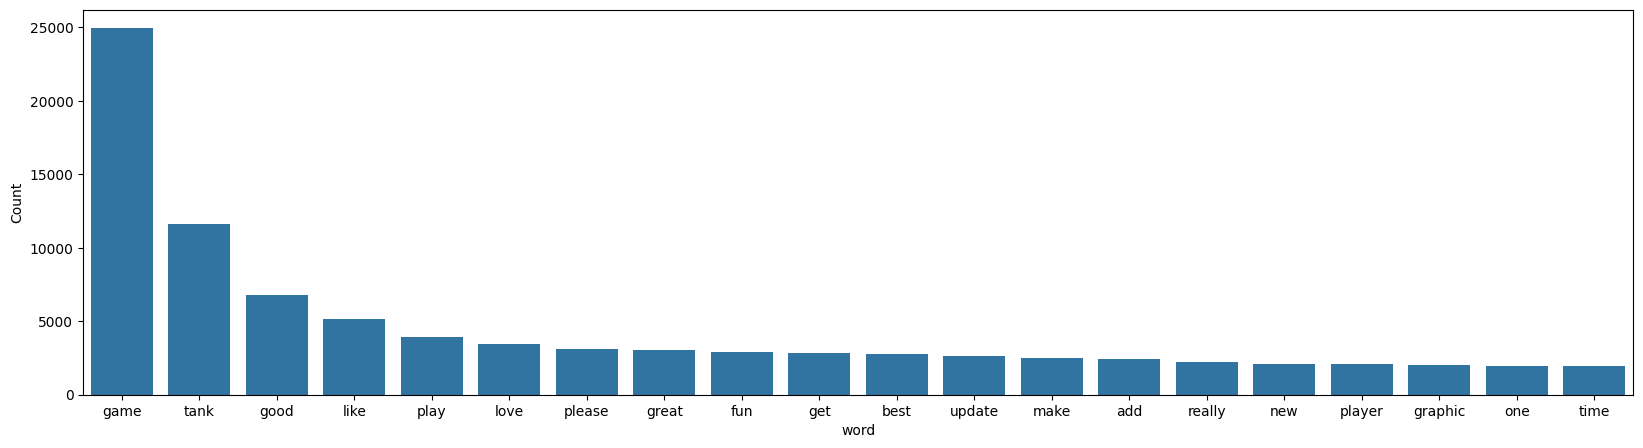

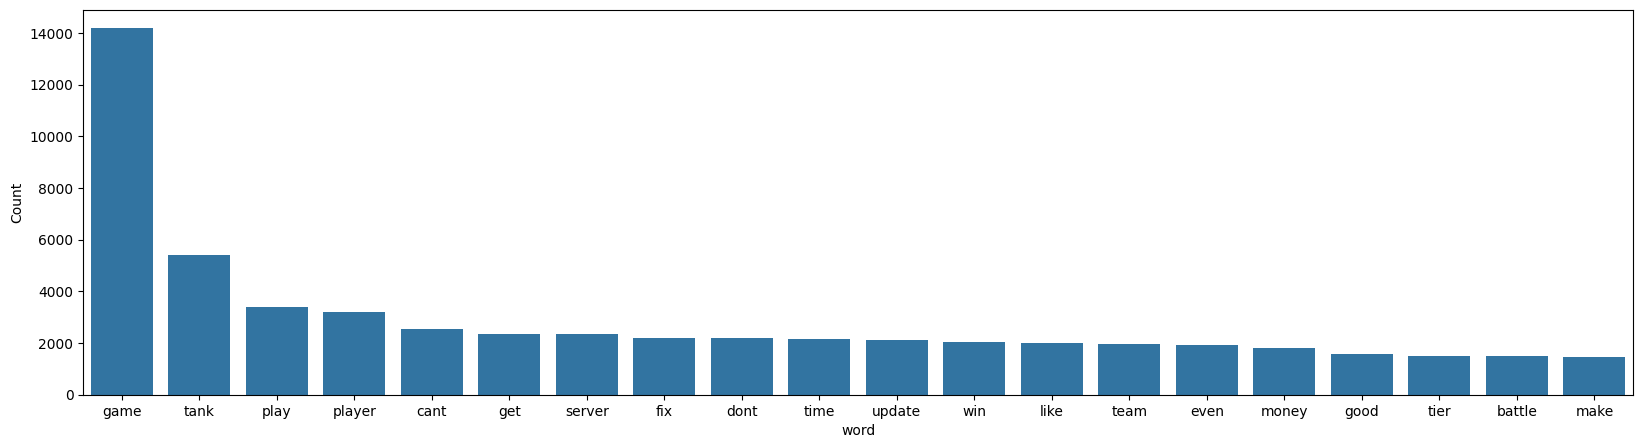

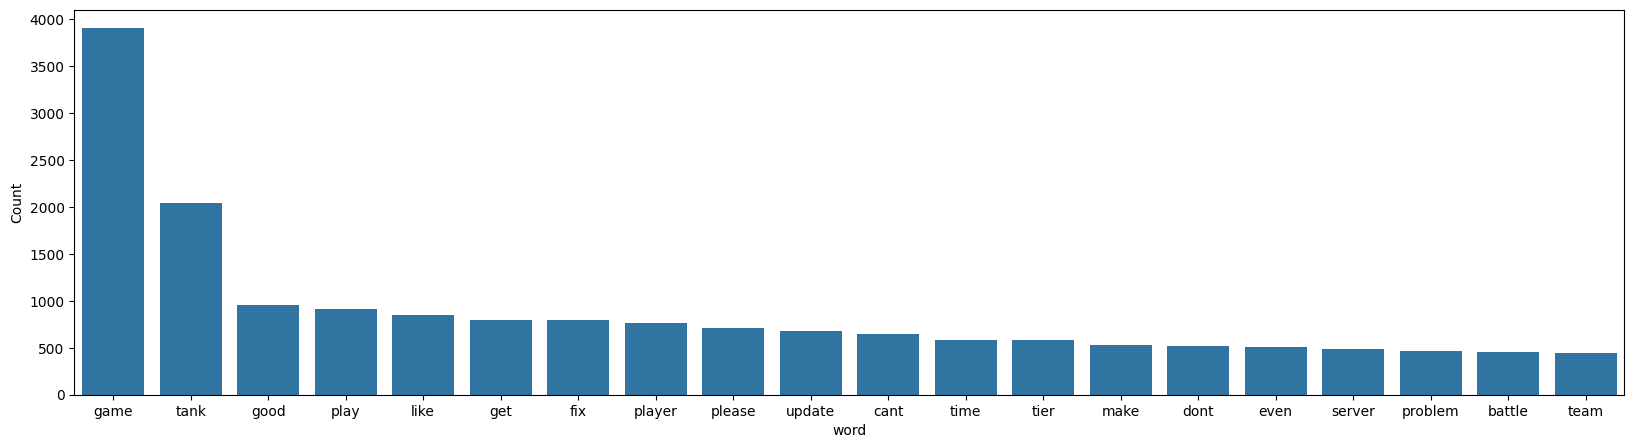

In [28]:
# Create bar charts to display the frequency of key terms or topics in positive and negative reviews
from collections import Counter
import seaborn as sns
# Function to plot the most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = Counter(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms)
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()
# Positive reviews
freq_words(review_df[(review_df['app_name'] == 'World of Tanks Blitz') & (review_df['sentiment']=='positive')]['processed_review'], 20)
# Negative reviews
freq_words(review_df[(review_df['app_name'] == 'World of Tanks Blitz') & (review_df['sentiment']=='negative')]['processed_review'], 20)
# Neutral reviews
freq_words(review_df[(review_df['app_name'] == 'World of Tanks Blitz') & (review_df['sentiment']=='neutral')]['processed_review'], 20)


In [29]:
# Create bar charts to display the frequency of bigram terms or topics in positive and negative reviews
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
import seaborn as sns
def freq_gram(x, n_gram,terms, title,plot):
    vec = CountVectorizer(ngram_range=(n_gram, n_gram)).fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    d = pd.DataFrame(words_freq[:terms], columns=['word', 'count'])
    if plot:
        plt.figure(figsize=(20, 5))
        ax = sns.barplot(data=d, x="word", y="count")
        
        # Rotate x-axis labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        
        # add title
        ax.set_title(title)
        
        ax.set(ylabel='Count')
        plt.show()
    else:
        return d

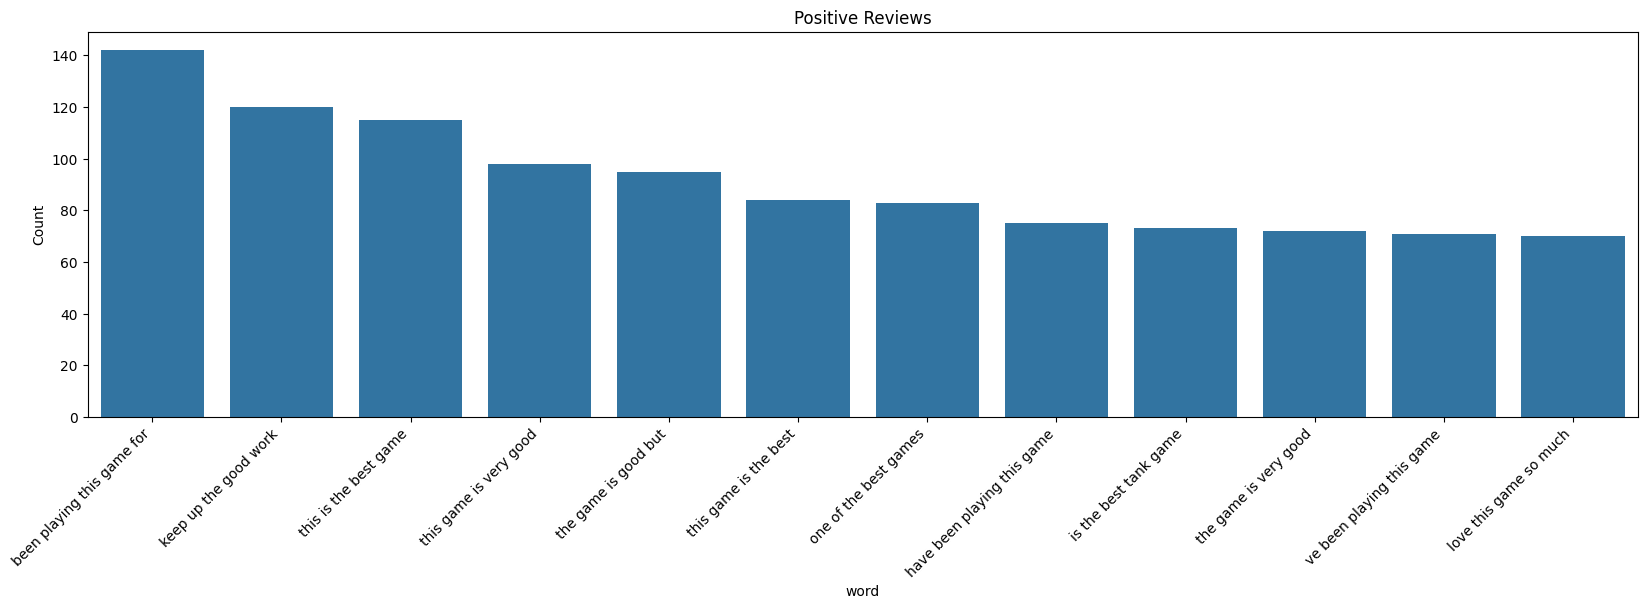

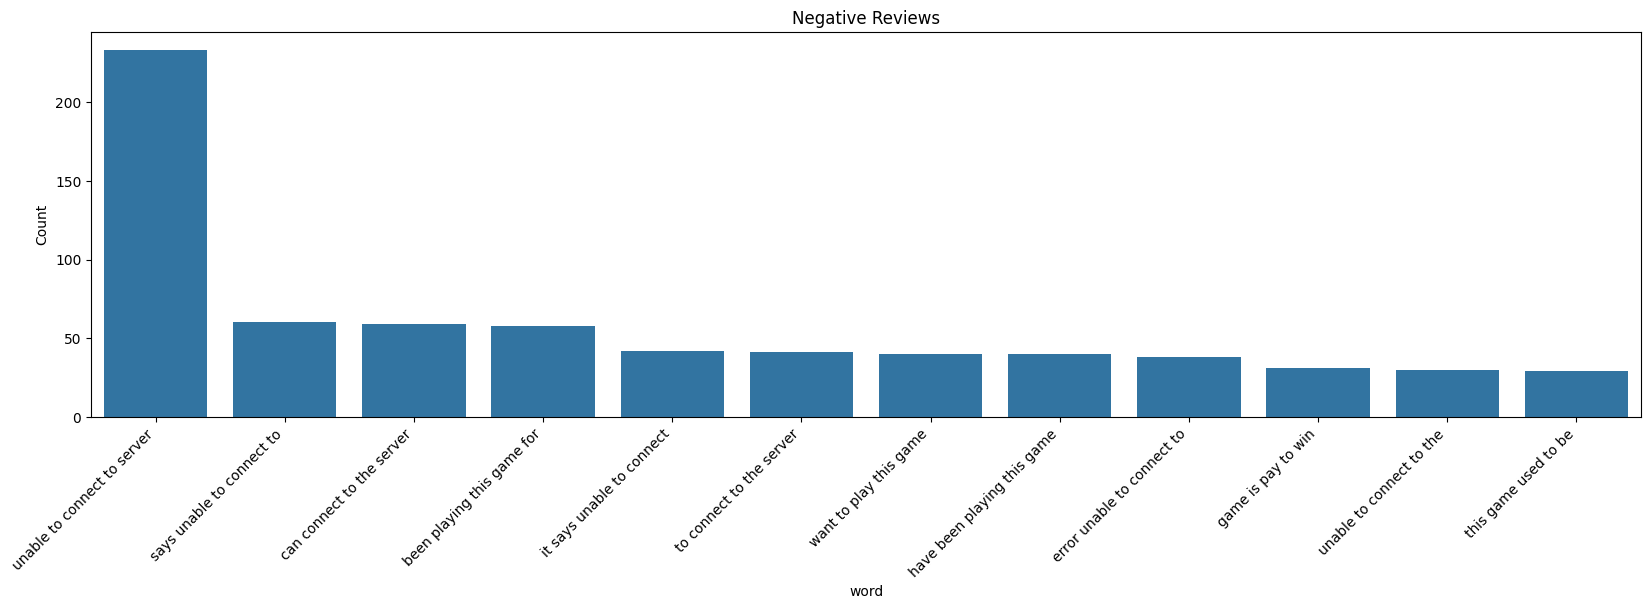

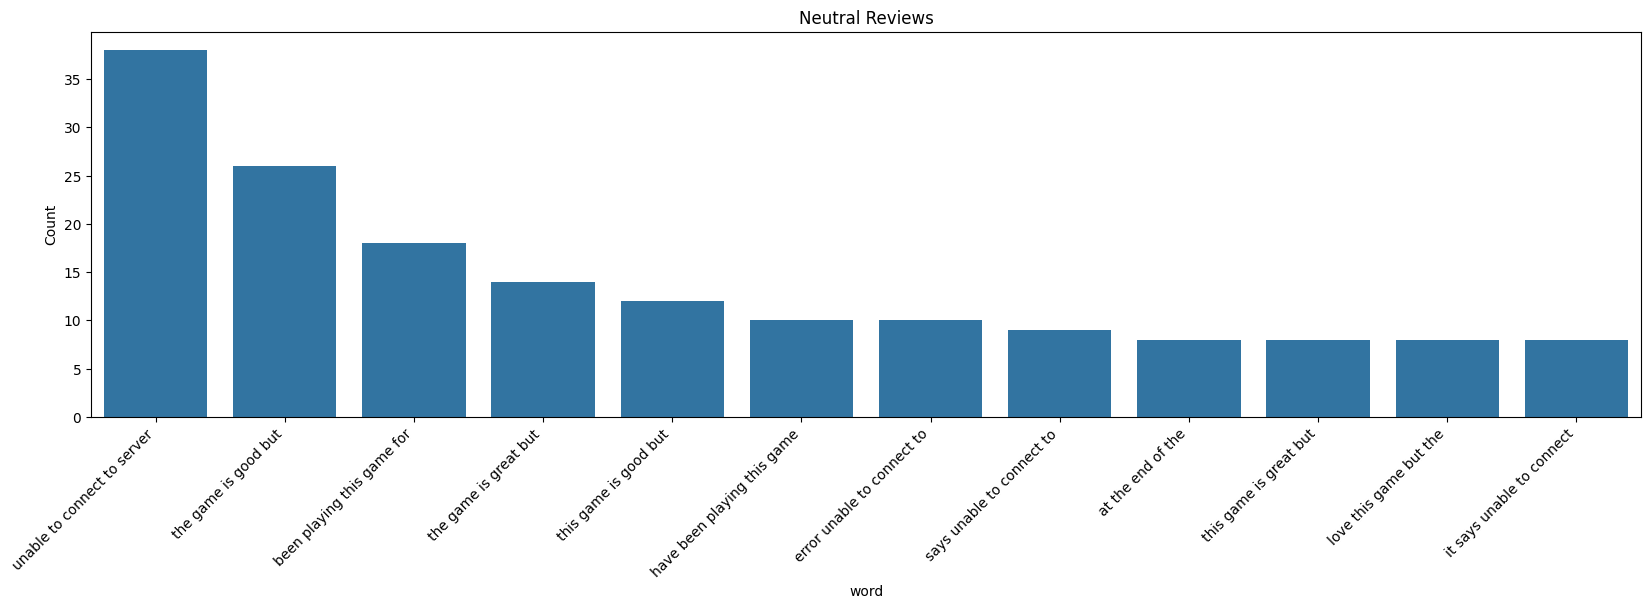

In [30]:
# plot Positive reviews horizental bar chart   
freq_gram(review_df[(review_df['app_name'] == 'World of Tanks Blitz') & (review_df['sentiment']=='positive')]['review'],5, 12, 'Positive Reviews',True)
# plot Negative reviews horizental bar chart
freq_gram(review_df[(review_df['app_name'] == 'World of Tanks Blitz') & (review_df['sentiment']=='negative')]['review'],5, 12, 'Negative Reviews',True)
# plot Neutral reviews horizental bar chart
freq_gram(review_df[(review_df['app_name'] == 'World of Tanks Blitz') & (review_df['sentiment']=='neutral')]['review'],5, 12, 'Neutral Reviews',True)

- from what we understand from this that for World of Tanks Blitz and the ranks <=3 the most common words related to 
server connction, or error in connect 

In [31]:
# extract the most common 4 gram words in positive, negative, neutral reviews for each game in one figure
#freq_bigram(review_df[(review_df['app_name'] == 'World of Tanks Blitz') & (review_df['sentiment']=='negative')]['processed_review'], 4, 'Positive Reviews', False)

# extract the most common 4 gram words in positive, negative, neutral reviews for each game in one dataframe
# Initialize an empty list to store DataFrames for each app
def extract_common_ngrams(n_gram, terms, review_type):
    dfs = []
    for app in review_df['app_name'].unique():
        # Create DataFrames for positive, negative, and neutral reviews
        positive_df = freq_gram(review_df[(review_df['app_name'] == app) & (review_df['sentiment'] == 'positive')][review_type],n_gram, terms, 'Positive Reviews', False)
        negative_df = freq_gram(review_df[(review_df['app_name'] == app) & (review_df['sentiment'] == 'negative')][review_type], n_gram, terms, 'Negative Reviews', False)
        neutral_df = freq_gram(review_df[(review_df['app_name'] == app) & (review_df['sentiment'] == 'neutral')][review_type], n_gram ,terms, 'Neutral Reviews', False)

        # Add app_name to each DataFrame
        positive_df['app_name'] = app
        negative_df['app_name'] = app
        neutral_df['app_name'] = app

        # add sentiment to each DataFrame
        positive_df['sentiment'] = 'positive'
        negative_df['sentiment'] = 'negative'
        neutral_df['sentiment'] = 'neutral'
        

        # Append the DataFrames to the list
        dfs.extend([positive_df, negative_df, neutral_df])

    # Concatenate the list of DataFrames into a single DataFrame
    df = pd.concat(dfs, ignore_index=True)
    fig, axes = plt.subplots(5, 2, figsize=(15, 30))
    axes = axes.flatten()
    for i, app in enumerate(review_df['app_name'].unique()):
        # calcualte the histogram for positive, negative, neutral reviews for each app with log scale
        sns.barplot(data=df[df['app_name'] == app], x='word', y='count', hue='sentiment', ax=axes[i])
        axes[i].set_title(app)
        axes[i].set_xlabel('Word')
        axes[i].set_ylabel('Count')
        #  Rotate x-axis labels
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        axes[i].legend()
    plt.tight_layout()
    plt.show()

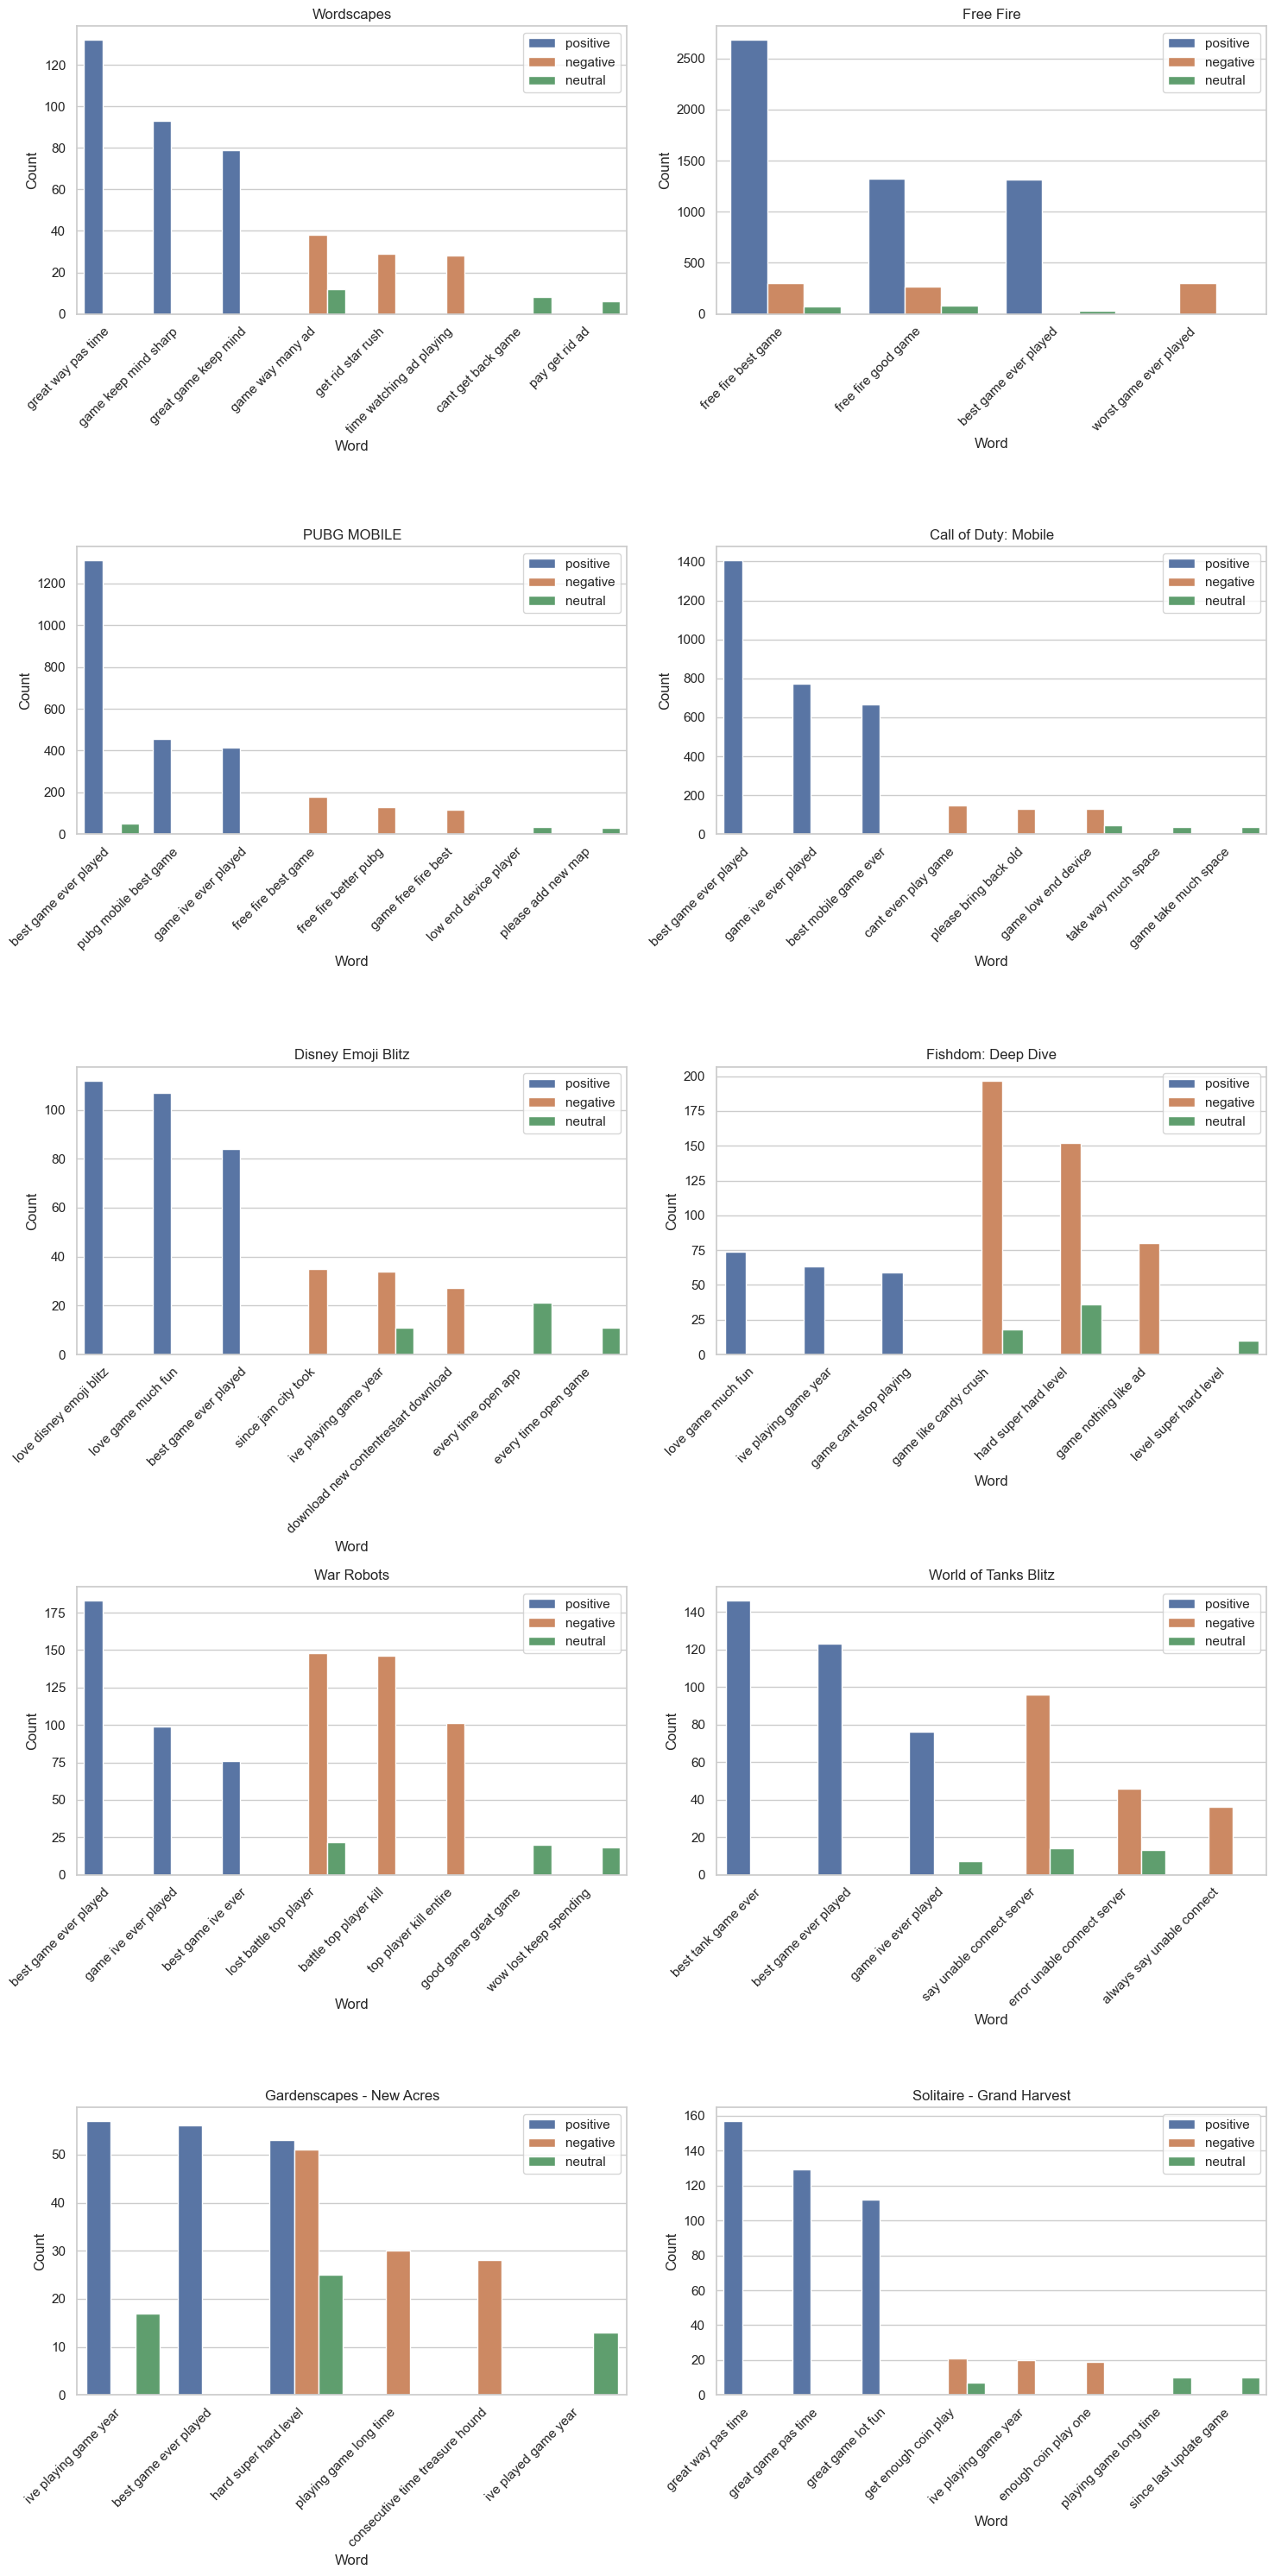

In [451]:
extract_common_ngrams(4, 3, 'processed_review_without_dup')

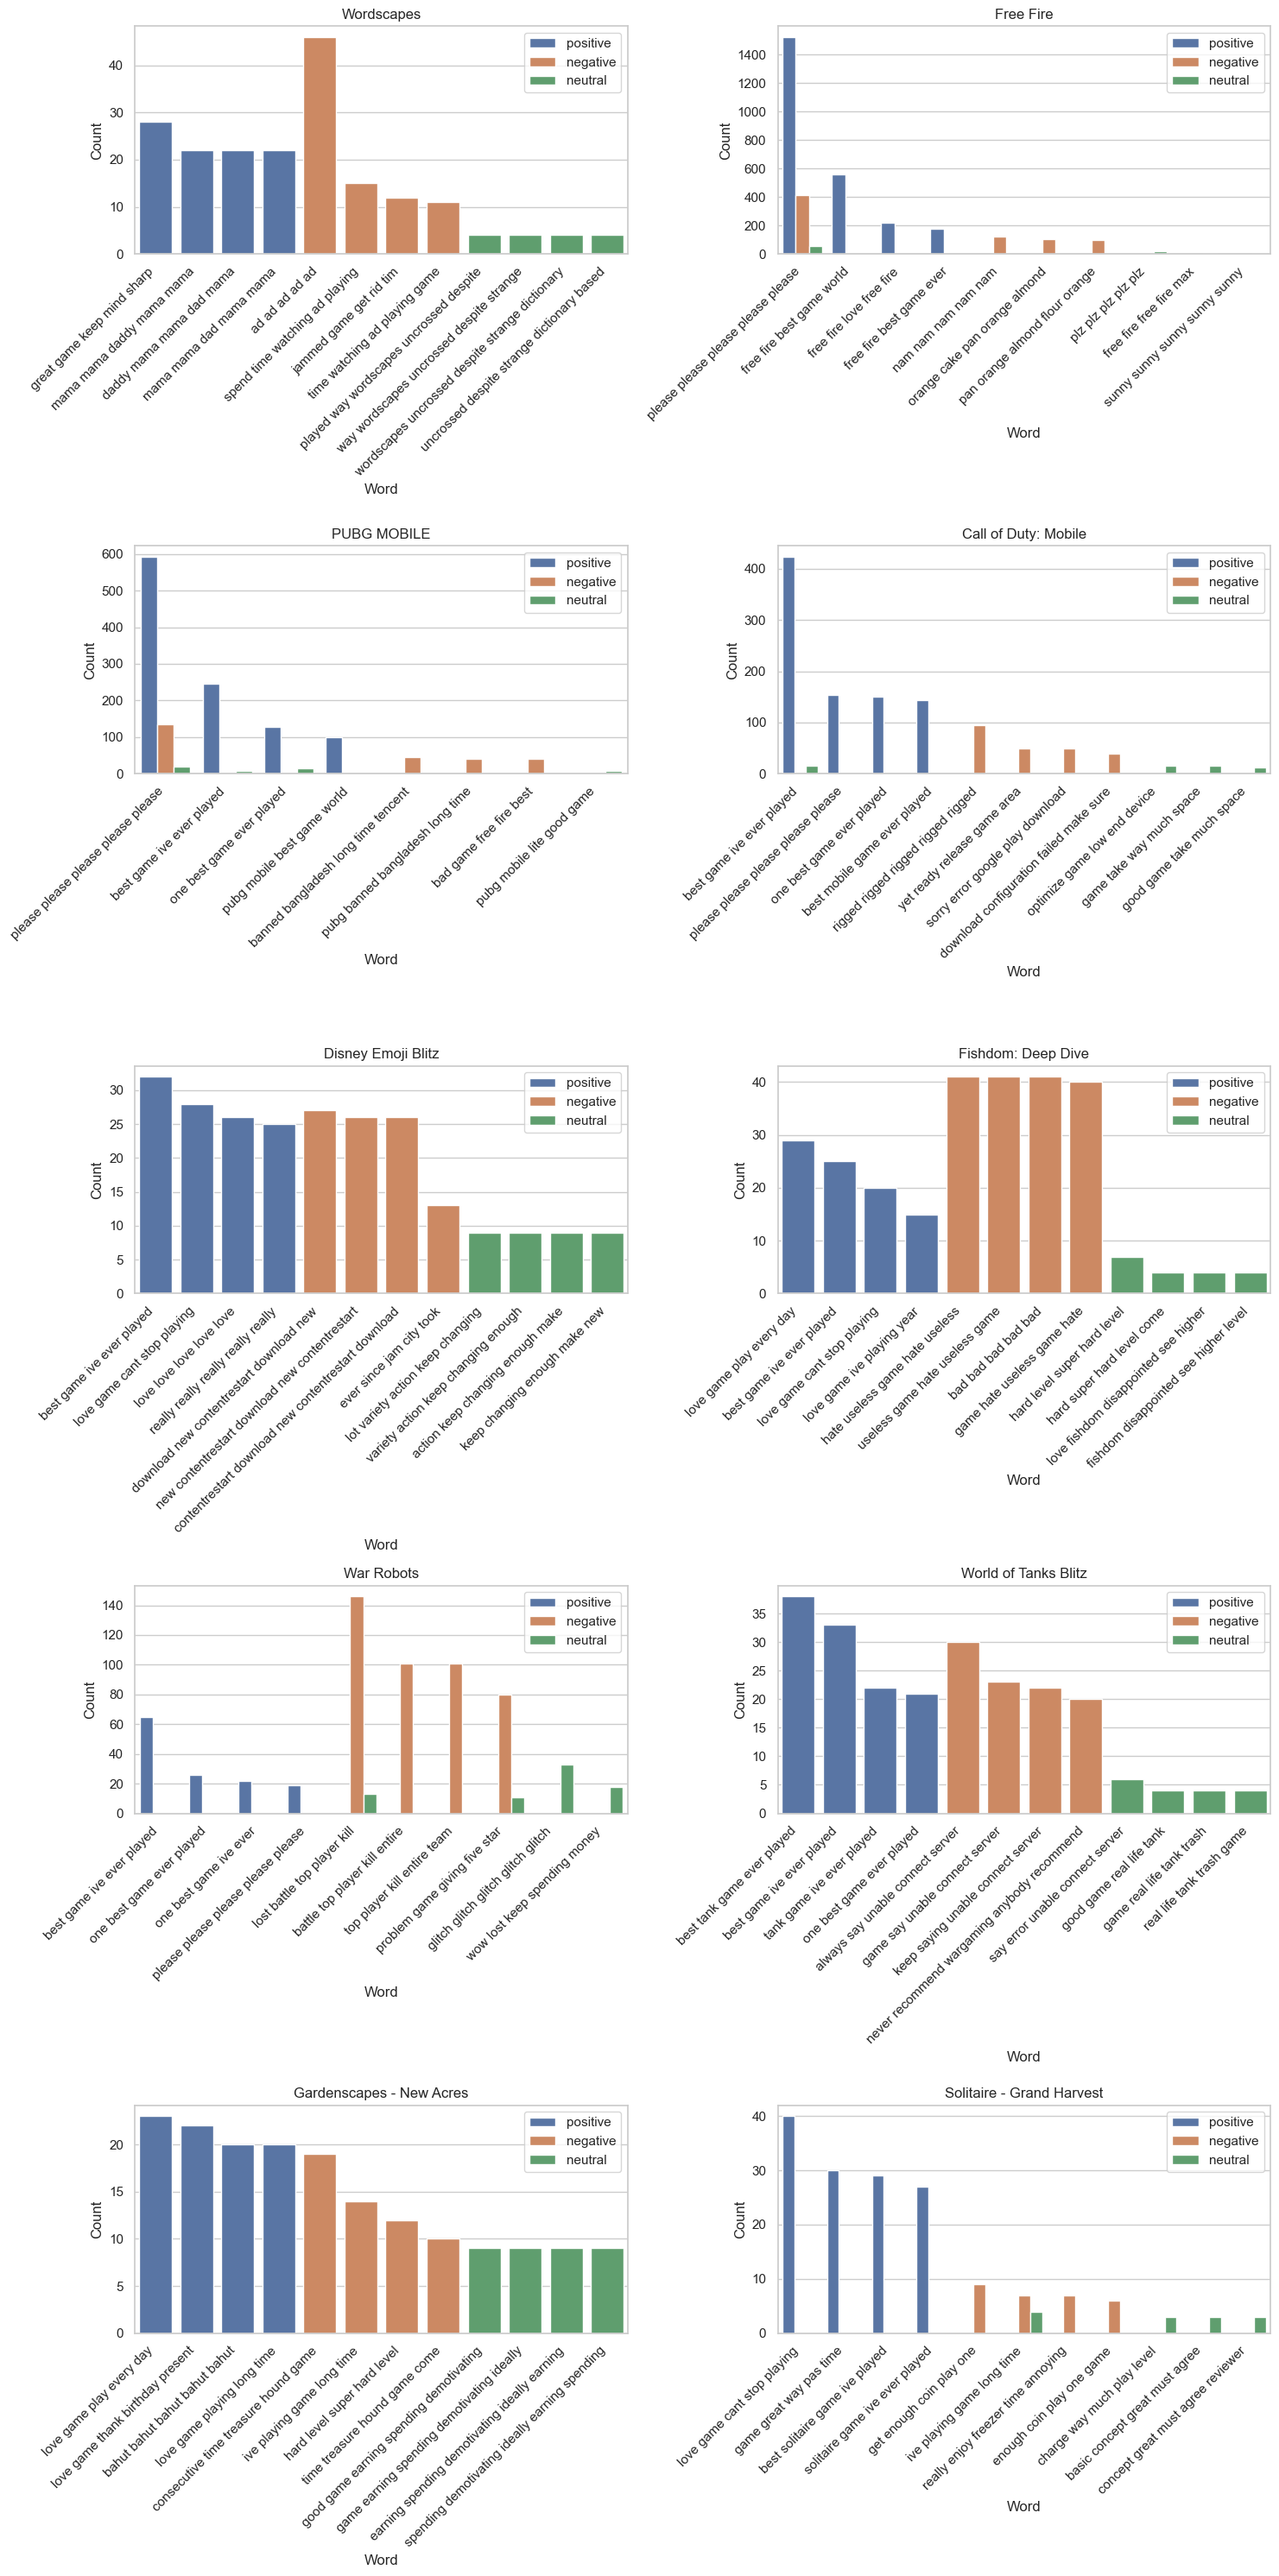

In [422]:
# create subplots for each app in df with legend based on sentiment
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
axes = axes.flatten()
for i, app in enumerate(review_df['app_name'].unique()):
    # calcualte the histogram for positive, negative, neutral reviews for each app with log scale
    sns.barplot(data=df[df['app_name'] == app], x='word', y='count', hue='sentiment', ax=axes[i])
    axes[i].set_title(app)
    axes[i].set_xlabel('Word')
    axes[i].set_ylabel('Count')
    #  Rotate x-axis labels
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].legend()
plt.tight_layout()
plt.show()

In [32]:
# we can see that many words are frequently duplictated after each other for the same keywords many times
# so we need to remove the duplicated words to get better results
# remove duplicated words if it is duplicated more than 3 time after each other
def remove_duplicated_words(text):
    tokens = word_tokenize(text)
    tokens = [tokens[i] for i in range(len(tokens)) if i == 0 or tokens[i] != tokens[i-1]]
    return ' '.join(tokens)


In [33]:
review_df['processed_review_without_dup']=review_df['processed_review'].progress_apply(remove_duplicated_words)

100%|██████████| 1767584/1767584 [00:59<00:00, 29914.53it/s]
